In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
!ls "/content/drive/My Drive/Deep Learning"

 1.jpg			  fashion-mnist_train.csv   Untitled3.ipynb
 2.jpg			  Housing.CSV		    Untitled4.ipynb
 3.jpg			  insurance.csv		    Untitled5.ipynb
'Assignment #4.ipynb'	  Untitled0.ipynb	    Untitled6.ipynb
'Assignment #5.ipynb'	 'Untitled (1)'		    win2.xls
 cifar-10-batches-py	  Untitled1.ipynb	    wine1.xls
 fashion-mnist_test.csv   Untitled2.ipynb


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [52]:
df = pd.read_csv("/content/drive/My Drive/Deep Learning/insurance.csv")

In [53]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [54]:
Male = pd.get_dummies(df['sex'], drop_first=True)
df = pd.concat([df, Male], axis=1 )

In [55]:
Smoker = pd.get_dummies(df['smoker'], drop_first=True)
df = pd.concat([df, Smoker], axis=1 )

In [56]:
df = df.rename(columns={'yes':'Smoker'})

In [57]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [58]:
region = pd.get_dummies(df['region'])
df = pd.concat([df, region], axis=1 )
#df.drop('region', axis=1,inplace=True)
#df.drop(['sex','smoker'], axis=1, inplace=True)

In [59]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0


In [60]:
df.drop(['sex', 'region', 'smoker', 'southwest'], axis=1, inplace=True)

In [61]:
df.head()

,age,bmi,children,charges,male,Smoker,northeast,northwest,southeast
0,19,27.900,0,16884.92400,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


In [62]:
X=df.drop('charges', axis=1)
y=df['charges']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_validate = scaler.transform(X_test)

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
model = Sequential()
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 3, activation = 'relu'))
#model.add(Dropout(0.5))

#model.add(Dense(units = 2, activation = 'relu'))
#model.add(Dense(units = 4, activation = 'relu'))
#model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))



model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mse')
early_stop = EarlyStopping(monitor='val_loss', mode= 'min', verbose= 0, patience=15)

In [66]:
model.fit(x=X_train, y=y_train, epochs = 2000, validation_data=(X_test, y_test), batch_size=128, callbacks=[early_stop])

Epoch 1/2000
8/8 [==============================] - 0s 19ms/step - loss: 328006464.0000 - val_loss: 306639072.0000
Epoch 2/2000
8/8 [==============================] - 0s 3ms/step - loss: 328005984.0000 - val_loss: 306631520.0000
Epoch 3/2000
8/8 [==============================] - 0s 3ms/step - loss: 328005568.0000 - val_loss: 306624736.0000
Epoch 4/2000
8/8 [==============================] - 0s 3ms/step - loss: 328005152.0000 - val_loss: 306618688.0000
Epoch 5/2000
8/8 [==============================] - 0s 3ms/step - loss: 328004832.0000 - val_loss: 306613408.0000
Epoch 6/2000
8/8 [==============================] - 0s 3ms/step - loss: 328004512.0000 - val_loss: 306608672.0000
Epoch 7/2000
8/8 [==============================] - 0s 3ms/step - loss: 328004224.0000 - val_loss: 306604384.0000
Epoch 8/2000
8/8 [==============================] - 0s 3ms/step - loss: 328003936.0000 - val_loss: 306600352.0000
Epoch 9/2000
8/8 [==============================] - 0s 3ms/step - loss: 328003584.0000 

In [67]:
loss = pd.DataFrame(model.history.history)

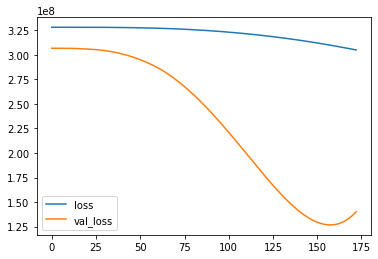

In [68]:
loss.plot()

In [69]:
from sklearn.metrics import mean_squared_error
pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test,pred))

11838.022901806418

In [70]:
entry_1 = df[:][257:477].drop('charges', axis=1)
pred = model.predict(entry_1)
np.sqrt(mean_squared_error(df[:][257:477]['charges'], pred))

11283.996656943273